
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.76      0.67       187
           1       0.88      0.77      0.82       413

    accuracy                           0.77       600
   macro avg       0.74      0.77      0.75       600
weighted avg       0.79      0.77      0.77       600

Confusion Matrix:
[[143  44]
 [ 96 317]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       187
           1       1.00      0.98      0.99       413

    accuracy                           0.99       600
   macro avg       0.98      0.99      0.98       600
weighted avg       0.99      0.99      0.99       600

Confusion Matrix:
[[187   0]
 [  8 405]]

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.84       187
           1       0.96   

<Figure size 1000x600 with 0 Axes>

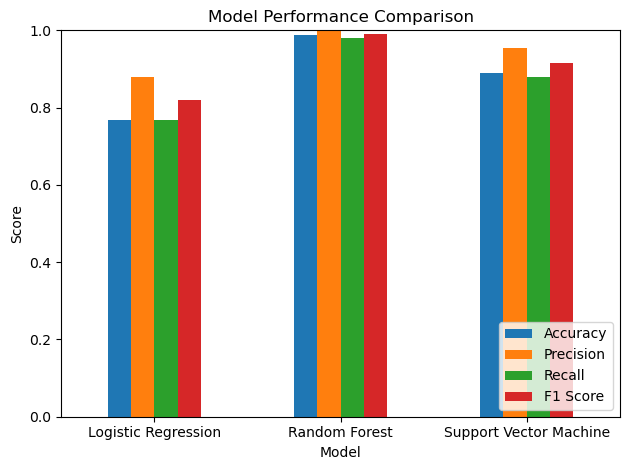


Model Performance Summary:
                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.766667   0.878116  0.767554  0.819121
1           Random Forest  0.986667   1.000000  0.980630  0.990220
2  Support Vector Machine  0.888333   0.955263  0.878935  0.915511

Best Model Selection: Random Forest
Selected based on highest F1 Score: 0.9902
- Precision: 1.0000
- Recall: 0.9806


In [15]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, 
                            recall_score, f1_score, confusion_matrix,
                            classification_report)
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r"C:\Users\Rohith\Downloads\Flyzy Flight Cancellation - Sheet1 (1).csv")
target = 'Flight_Cancelled'
X = df.drop(target, axis=1)
y = df[target]

# Identify columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "Support Vector Machine": SVC(class_weight='balanced', probability=True, random_state=42)
}

# Store results and pipelines
results = []
pipelines = {}

# Train and evaluate models
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Store pipeline for later use
    pipelines[name] = pipeline
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    
    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Create results dataframe
results_df = pd.DataFrame(results)

# Save results to CSV
results_df.to_csv('classification_model_results.csv', index=False)
print("\nResults saved to 'classification_model_results.csv'")

# Find best model based on F1 Score (balanced metric for imbalanced data)
best_model_info = results_df.loc[results_df['F1 Score'].idxmax()]
best_model_name = best_model_info['Model']
best_model = pipelines[best_model_name]

# Save best model to file
joblib.dump(best_model, 'best_flight_cancellation_model.pkl')
print(f"\nBest model '{best_model_name}' saved to 'best_flight_cancellation_model.pkl'")

# Plot comparison
plt.figure(figsize=(10, 6))
results_df.set_index('Model').plot(kind='bar', rot=0)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('model_comparison.png')  # Save the plot
plt.show()

# Display results and best model selection
print("\n" + "="*50)
print("Model Performance Summary:")
print("="*50)
print(results_df)

print("\n" + "="*50)
print(f"Best Model Selection: {best_model_name}")
print("="*50)
print(f"Selected based on highest F1 Score: {best_model_info['F1 Score']:.4f}")
print(f"- Precision: {best_model_info['Precision']:.4f}")
print(f"- Recall: {best_model_info['Recall']:.4f}")